In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import proj1_helpers as helpers
import scipy as sp
import matplotlib.pyplot as plot
import numpy as np
import implementations as implementations
from run import *
from jgrondier_helpers import pearson_coeffs, build_pearson_coeffs_data

In [33]:

y, tX, ids = helpers.load_csv_data("../data/train.csv")
column_labels = "Id	Prediction	DER_mass_MMC	DER_mass_transverse_met_lep	DER_mass_vis	DER_pt_h	DER_deltaeta_jet_jet	DER_mass_jet_jet	DER_prodeta_jet_jet	DER_deltar_tau_lep	DER_pt_tot	DER_sum_pt	DER_pt_ratio_lep_tau	DER_met_phi_centrality	DER_lep_eta_centrality	PRI_tau_pt	PRI_tau_eta	PRI_tau_phi	PRI_lep_pt	PRI_lep_eta	PRI_lep_phi	PRI_met	PRI_met_phi	PRI_met_sumet	PRI_jet_num	PRI_jet_leading_pt	PRI_jet_leading_eta	PRI_jet_leading_phi	PRI_jet_subleading_pt	PRI_jet_subleading_eta	PRI_jet_subleading_phi	PRI_jet_all_pt".split("\t")[2:]

In [34]:

def prep_data(data):
    """transforms mass and filters columns"""
    cols = np.array([remove_undef(c) for c in np.copy(data.T)])
    return np.c_[np.ones(len(data)), 
                 np.where(data[:, 0] < 0, -1, 1), # mass bool
                standardize_matrix(cols.T)]


In [35]:
tmp = prep_data(tX)[:, 2:]

tmp_full = prepare_data(tX, analysed=analyse_data(tX))[:, 2:]

In [40]:
l = pearson_coeffs(y, tmp);
sorted_l = sorted(l, key = lambda x : abs(x[1]), reverse=True)
abs_sorted_l = [[a,abs(b)] for a,b in sorted_l]

l_full = pearson_coeffs(y, tmp_full)
sorted_l_full = sorted(l_full, key = lambda x : abs(x[1]), reverse=True)
abs_sorted_l_full = [[a,abs(b)] for a,b in sorted_l_full]

l

array([[  0.00000000e+00,   1.09935641e-02],
       [  1.00000000e+00,  -3.51427956e-01],
       [  2.00000000e+00,  -1.40552738e-02],
       [  3.00000000e+00,   1.92526329e-01],
       [  4.00000000e+00,   1.85285704e-01],
       [  5.00000000e+00,   1.78750998e-01],
       [  6.00000000e+00,  -1.66116553e-01],
       [  7.00000000e+00,   1.22454813e-02],
       [  8.00000000e+00,  -1.52874267e-02],
       [  9.00000000e+00,   1.53235932e-01],
       [  1.00000000e+01,  -1.95397896e-01],
       [  1.10000000e+01,   2.71751877e-01],
       [  1.20000000e+01,   1.73871947e-01],
       [  1.30000000e+01,   2.35237976e-01],
       [  1.40000000e+01,  -9.43251058e-04],
       [  1.50000000e+01,  -4.40253869e-03],
       [  1.60000000e+01,  -3.19475868e-02],
       [  1.70000000e+01,   1.51623538e-03],
       [  1.80000000e+01,   4.12544741e-03],
       [  1.90000000e+01,   2.24657515e-02],
       [  2.00000000e+01,   7.47534219e-03],
       [  2.10000000e+01,   1.35520262e-01],
       [  

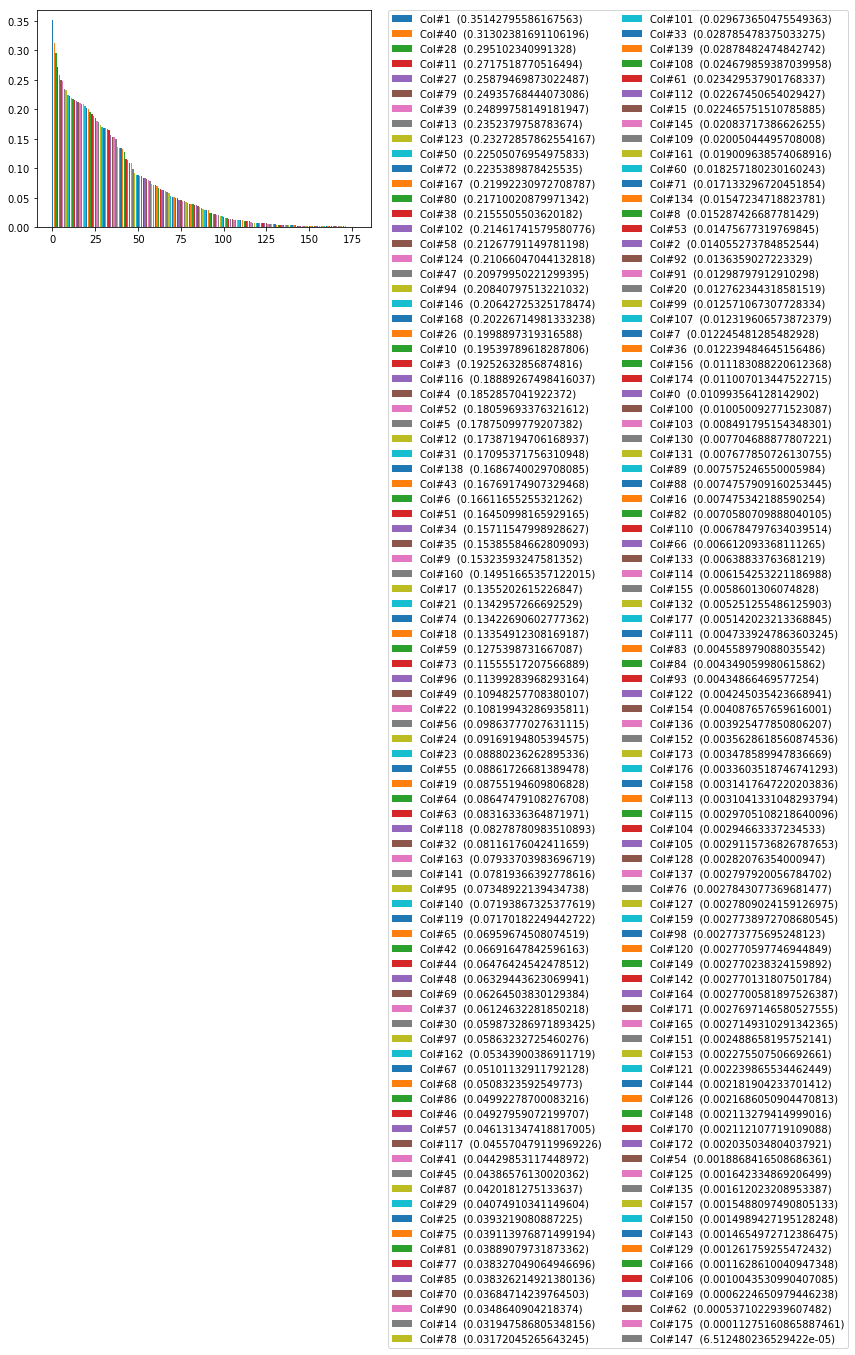

In [42]:
for i,e in enumerate(abs_sorted_l_full):
    plot.bar(i, e[1], label="Col#{}  ({})".format(int(e[0]), e[1]))
    
lgd = plot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 2)

plot.savefig("factors/absolute_coeffs_bars", bbox_extra_artists=(lgd,), bbox_inches='tight')

plot.show()

In [9]:
for i,e in enumerate(sorted_l):
    plot.bar(i, e[1], label=column_labels[e[0]]+" ({})".format(e[1]))
    
plot.plot([0] * len(sorted_l),)


lgd = plot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 2)

plot.savefig("factors/coeffs_bars", bbox_extra_artists=(lgd,), bbox_inches='tight')


plot.show()

TypeError: list indices must be integers or slices, not numpy.float64

In [12]:
def shadow_permutations(y, tX, ref_coeffs, perms=100):
    
    to_return = []
    
    for i, col in enumerate(tX.T):
        
        shadow_copies = np.array([np.random.permutation(col) for j in range(perms)]).T
        shadow_coeffs = pearson_coeffs(y, shadow_copies)
        shadow_coeffs_abs = np.array([ abs(x[1]) for x in shadow_coeffs])
        
        shadow_coeffs_max = np.max(shadow_coeffs_abs);
        shadow_coeffs_min = np.min(shadow_coeffs_abs)
        ref_coeff = abs(ref_coeffs[i][1])
        
        
        dif = shadow_coeffs_max - ref_coeff
        mag = shadow_coeffs_max/ref_coeff
        
        to_return.append({"column" : i, "dif": dif, "max" : shadow_coeffs_max, "min" : shadow_coeffs_min, "mag": mag})
        
        if  shadow_coeffs_max > ref_coeff:
            to_return[i]["fishy"] = True
        else:
            to_return[i]["fishy"] = False
        
        print("Finished processing col "+str(i))
    
    return to_return
        


In [15]:
sp_100_tmp = shadow_permutations(y, tmp, l)

sp_1000_tmp = shadow_permutations(y, tmp, l, 1000)

sp_100_tmp_full = shadow_permutations(y, tmp_full, l_full)

sp_300_tmp_full = shadow_permutations(y, tmp_full, l_full, 300)

Finished processing col 0
Finished processing col 1
Finished processing col 2
Finished processing col 3
Finished processing col 4
Finished processing col 5
Finished processing col 6
Finished processing col 7
Finished processing col 8
Finished processing col 9
Finished processing col 10
Finished processing col 11
Finished processing col 12
Finished processing col 13
Finished processing col 14
Finished processing col 15
Finished processing col 16
Finished processing col 17
Finished processing col 18
Finished processing col 19
Finished processing col 20
Finished processing col 21
Finished processing col 22
Finished processing col 23
Finished processing col 24
Finished processing col 25
Finished processing col 26
Finished processing col 27
Finished processing col 28
Finished processing col 29
Finished processing col 0
Finished processing col 1
Finished processing col 2
Finished processing col 3
Finished processing col 4
Finished processing col 5
Finished processing col 6
Finished processin

Finished processing col 5
Finished processing col 6
Finished processing col 7
Finished processing col 8
Finished processing col 9
Finished processing col 10
Finished processing col 11
Finished processing col 12
Finished processing col 13
Finished processing col 14
Finished processing col 15
Finished processing col 16
Finished processing col 17
Finished processing col 18
Finished processing col 19
Finished processing col 20
Finished processing col 21
Finished processing col 22
Finished processing col 23
Finished processing col 24
Finished processing col 25
Finished processing col 26
Finished processing col 27
Finished processing col 28
Finished processing col 29
Finished processing col 30
Finished processing col 31
Finished processing col 32
Finished processing col 33
Finished processing col 34
Finished processing col 35
Finished processing col 36
Finished processing col 37
Finished processing col 38
Finished processing col 39
Finished processing col 40
Finished processing col 41
Finish

In [43]:
sp_100_tmp_full = shadow_permutations(y, tmp_full, l_full)

Finished processing col 0
Finished processing col 1
Finished processing col 2
Finished processing col 3
Finished processing col 4
Finished processing col 5
Finished processing col 6
Finished processing col 7
Finished processing col 8
Finished processing col 9
Finished processing col 10
Finished processing col 11
Finished processing col 12
Finished processing col 13
Finished processing col 14
Finished processing col 15
Finished processing col 16
Finished processing col 17
Finished processing col 18
Finished processing col 19
Finished processing col 20
Finished processing col 21
Finished processing col 22
Finished processing col 23
Finished processing col 24
Finished processing col 25
Finished processing col 26
Finished processing col 27
Finished processing col 28
Finished processing col 29
Finished processing col 30
Finished processing col 31
Finished processing col 32
Finished processing col 33
Finished processing col 34
Finished processing col 35
Finished processing col 36
Finished pr

In [54]:
232 - len([x["column"] for x in sp_300_tmp_full if x["fishy"]]) 

148

In [ ]:
for i, col in enumerate(tmp.T):
    new_tmp = np.delete(tmp, [i], axis=1)
    
    coeffs = pearson_coeffs(col, new_tmp, 0.8)
    
    print(column_labels[i] +" : " + str(coeffs))
    

In [ ]:
heatmap = []

for i, col in enumerate(tmp.T):
    new_tmp = np.delete(tmp, [i], axis=1)
    coeffs = pearson_coeffs(col, new_tmp, 0.0)
    coeffs = [(abs(a[1])) for j,a in enumerate(coeffs) ]
    coeffs.insert(i, 1)
    heatmap.append(coeffs)

In [ ]:
heatmap = np.array(heatmap)
plot.imshow(heatmap, cmap="Oranges", clim=(0.5, 1.0))
plot.tick_params(axis='both', which='major', labelsize=8)
plot.yticks(np.arange(len(column_labels)), column_labels)
plot.xticks(np.arange(len(column_labels)), column_labels, rotation="vertical")

plot.savefig("factors/heatmap.png", bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=300)

plot.colorbar()

plot.show()

In [ ]:
plot.hist(heatmap.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plot.show()
